In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
data_energy = pd.read_csv("../raw_data/energy_dataset.csv")
data_energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [6]:
data_energy.shape

(35064, 29)

In [7]:
data_energy.describe

<bound method NDFrame.describe of                             time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...        

In [8]:
data_energy.info

<bound method DataFrame.info of                             time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...          

In [9]:
data_energy.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [10]:
def import_clean_data(df,dropNA=True):
 

    df['time'] = pd.to_datetime(df['time'], utc=True)
    df['time'] = df['time'].dt.tz_convert('Europe/Madrid')
    df = df.set_index('time')
    df = df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation marine', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation fossil coal-derived gas', 'generation wind offshore'])
    df.columns = df.columns.str.replace(' ', '_')

    if dropNA == True:
        df = df.dropna()

    return df

In [11]:
df = import_clean_data(data_energy)

In [12]:
df.dtypes

generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run-of-river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation_solar                               float64
generation_waste                               float64
generation_wind_onshore                        float64
forecast_solar_day_ahead                       float64
forecast_wind_onshore_day_ahead                float64
total_load_forecast                            float64
total_load_actual                              float64
price_day_

In [13]:
len(df.dtypes)

20

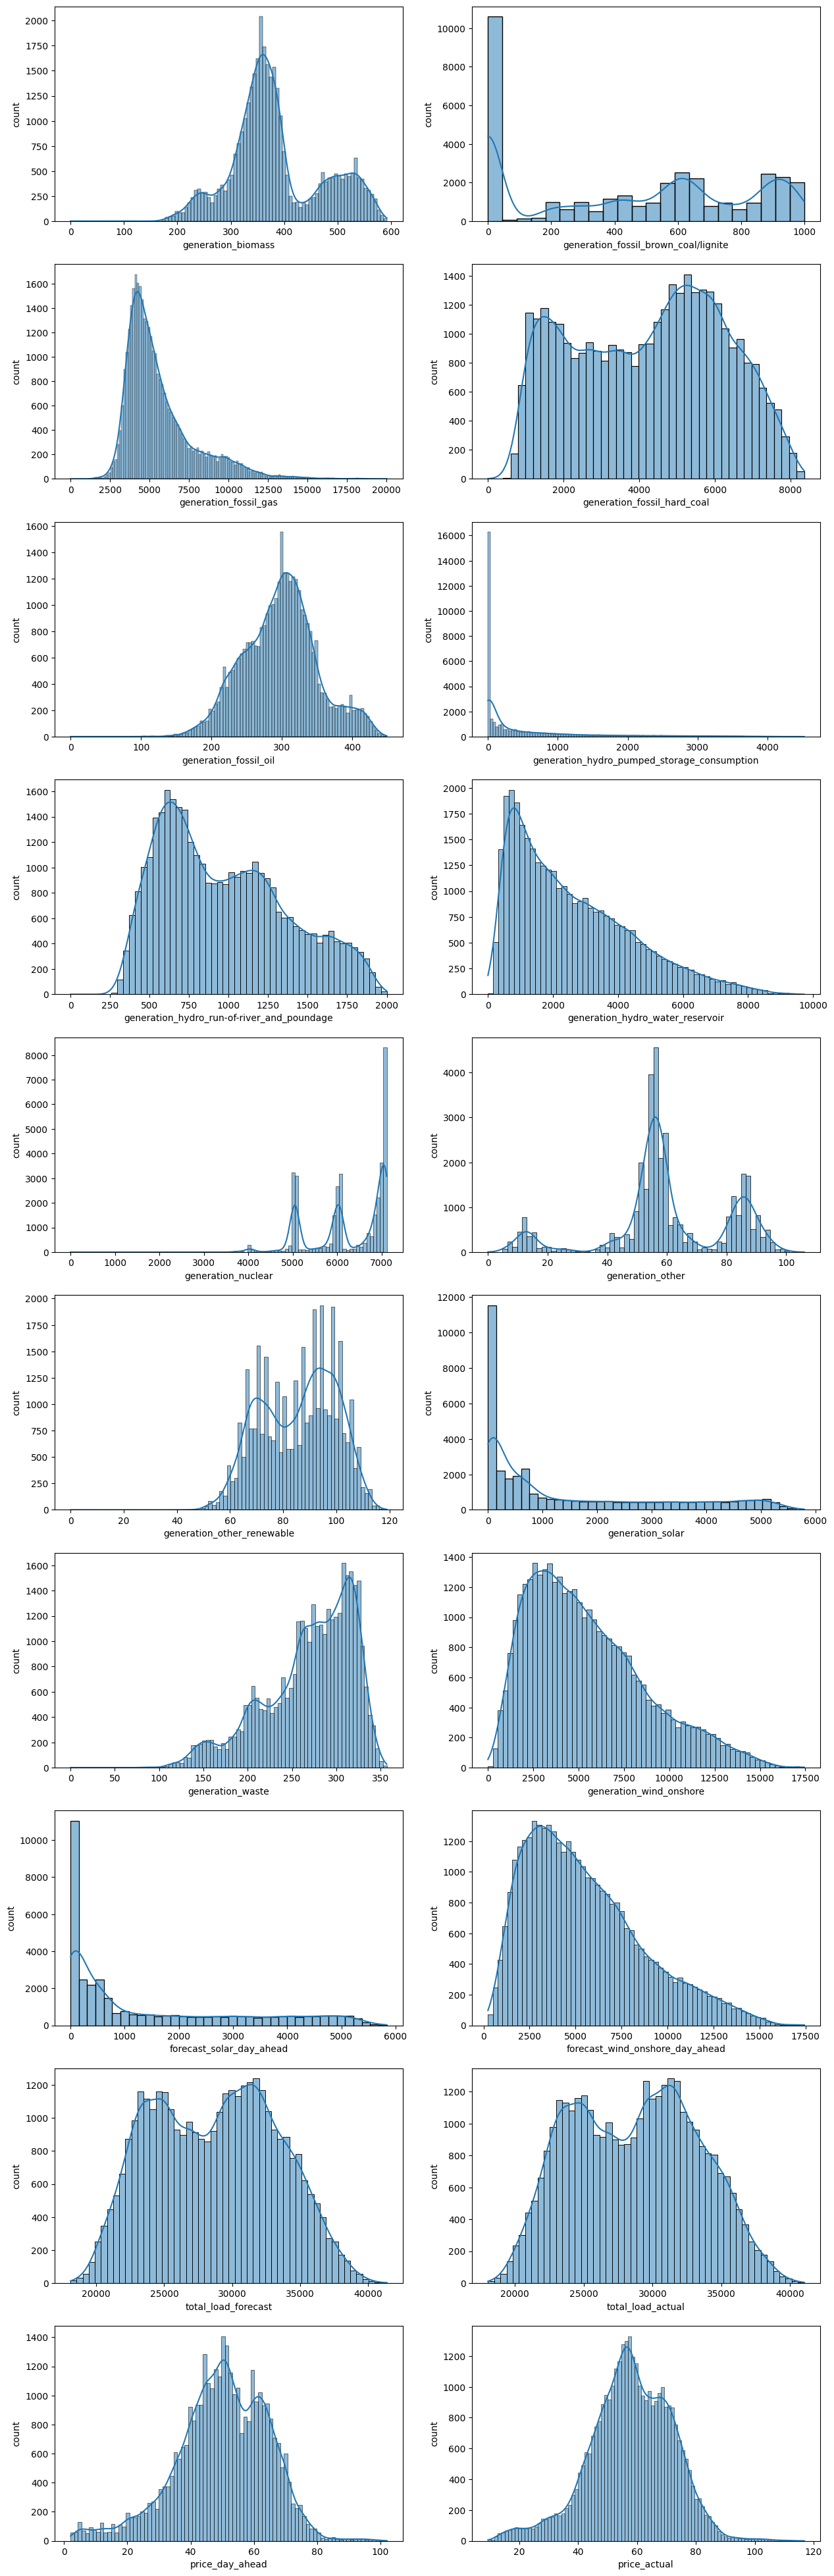

In [14]:
# histogram to see normal distribution of data energy features 

plt.figure(figsize=(15,50))
columns = df.columns
for col in range(0,20):
    ax = plt.subplot(10,2,col+1)
    sns.histplot(df[columns[col]], kde=True, ax=ax)
    plt.xlabel(columns[col])
    plt.ylabel('count')

Text(0.5, 1.0, 'price day ahead')

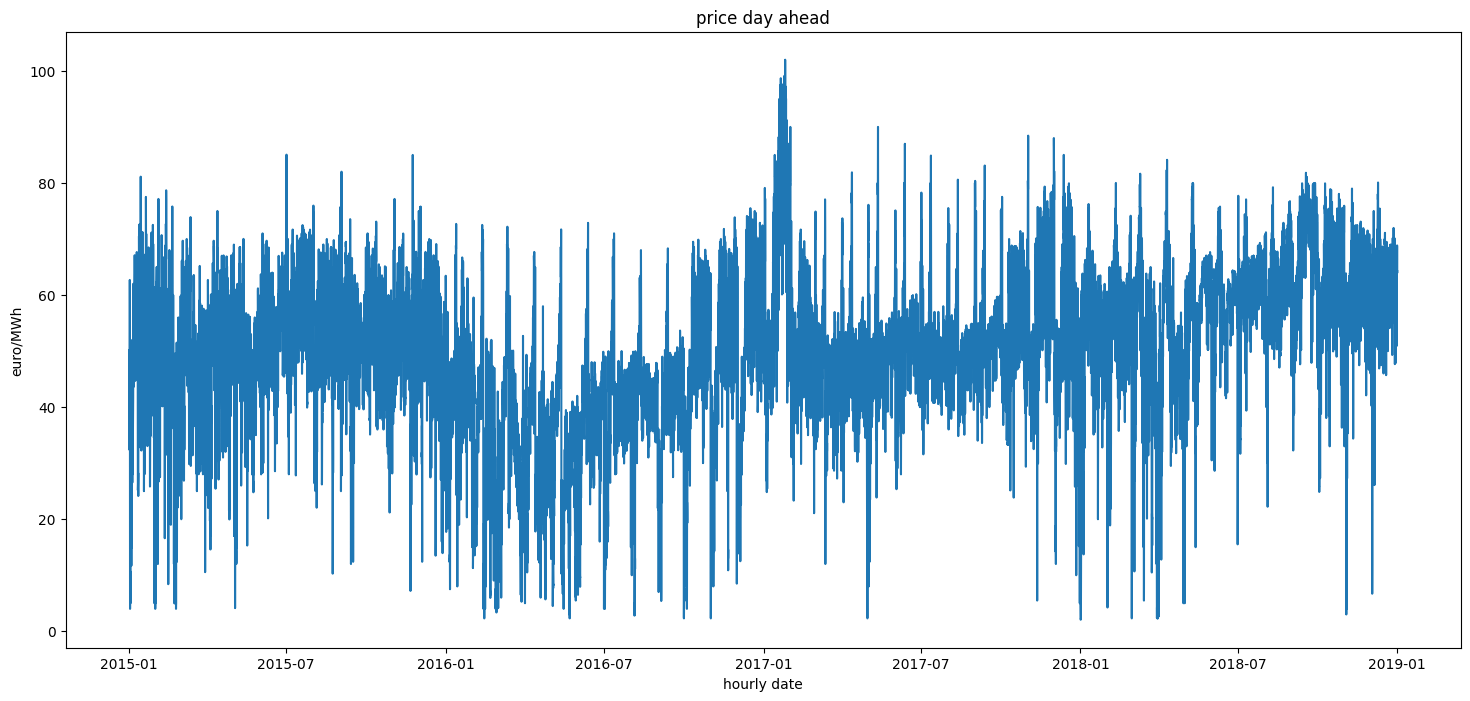

In [15]:
#timeseries for price day ahead

plt.figure(figsize=(18,8))
plt.plot(df['price_day_ahead'])
plt.xlabel('hourly date')
plt.ylabel('euro/MWh')
plt.title('price day ahead')

Text(0.5, 1.0, 'price actual')

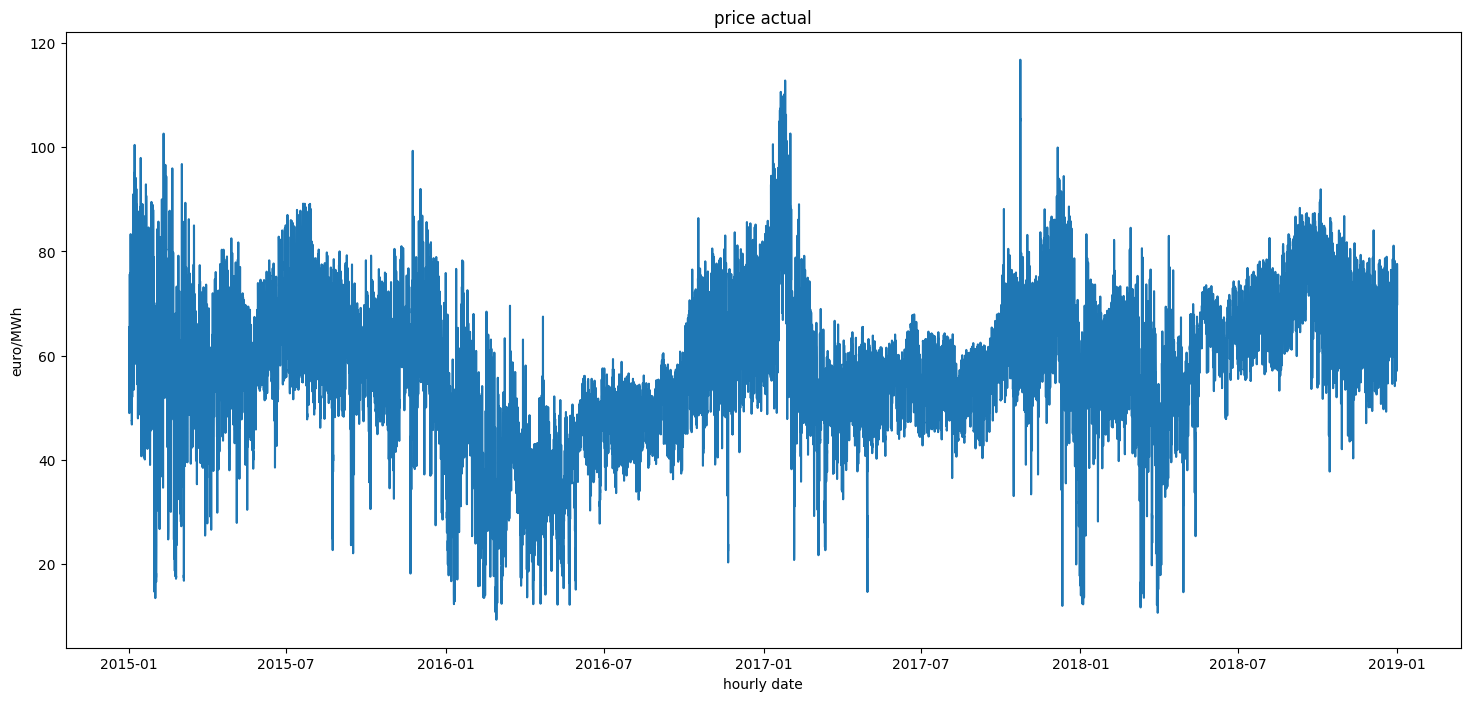

In [16]:
#timeseries for price actual

plt.figure(figsize=(18,8))
plt.plot(df['price_actual'])
plt.xlabel('hourly date')
plt.ylabel('euro/MWh')
plt.title('price actual')

/home/rahmah/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rahmah/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/rahmah/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rahmah/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_core.py:1326: Use

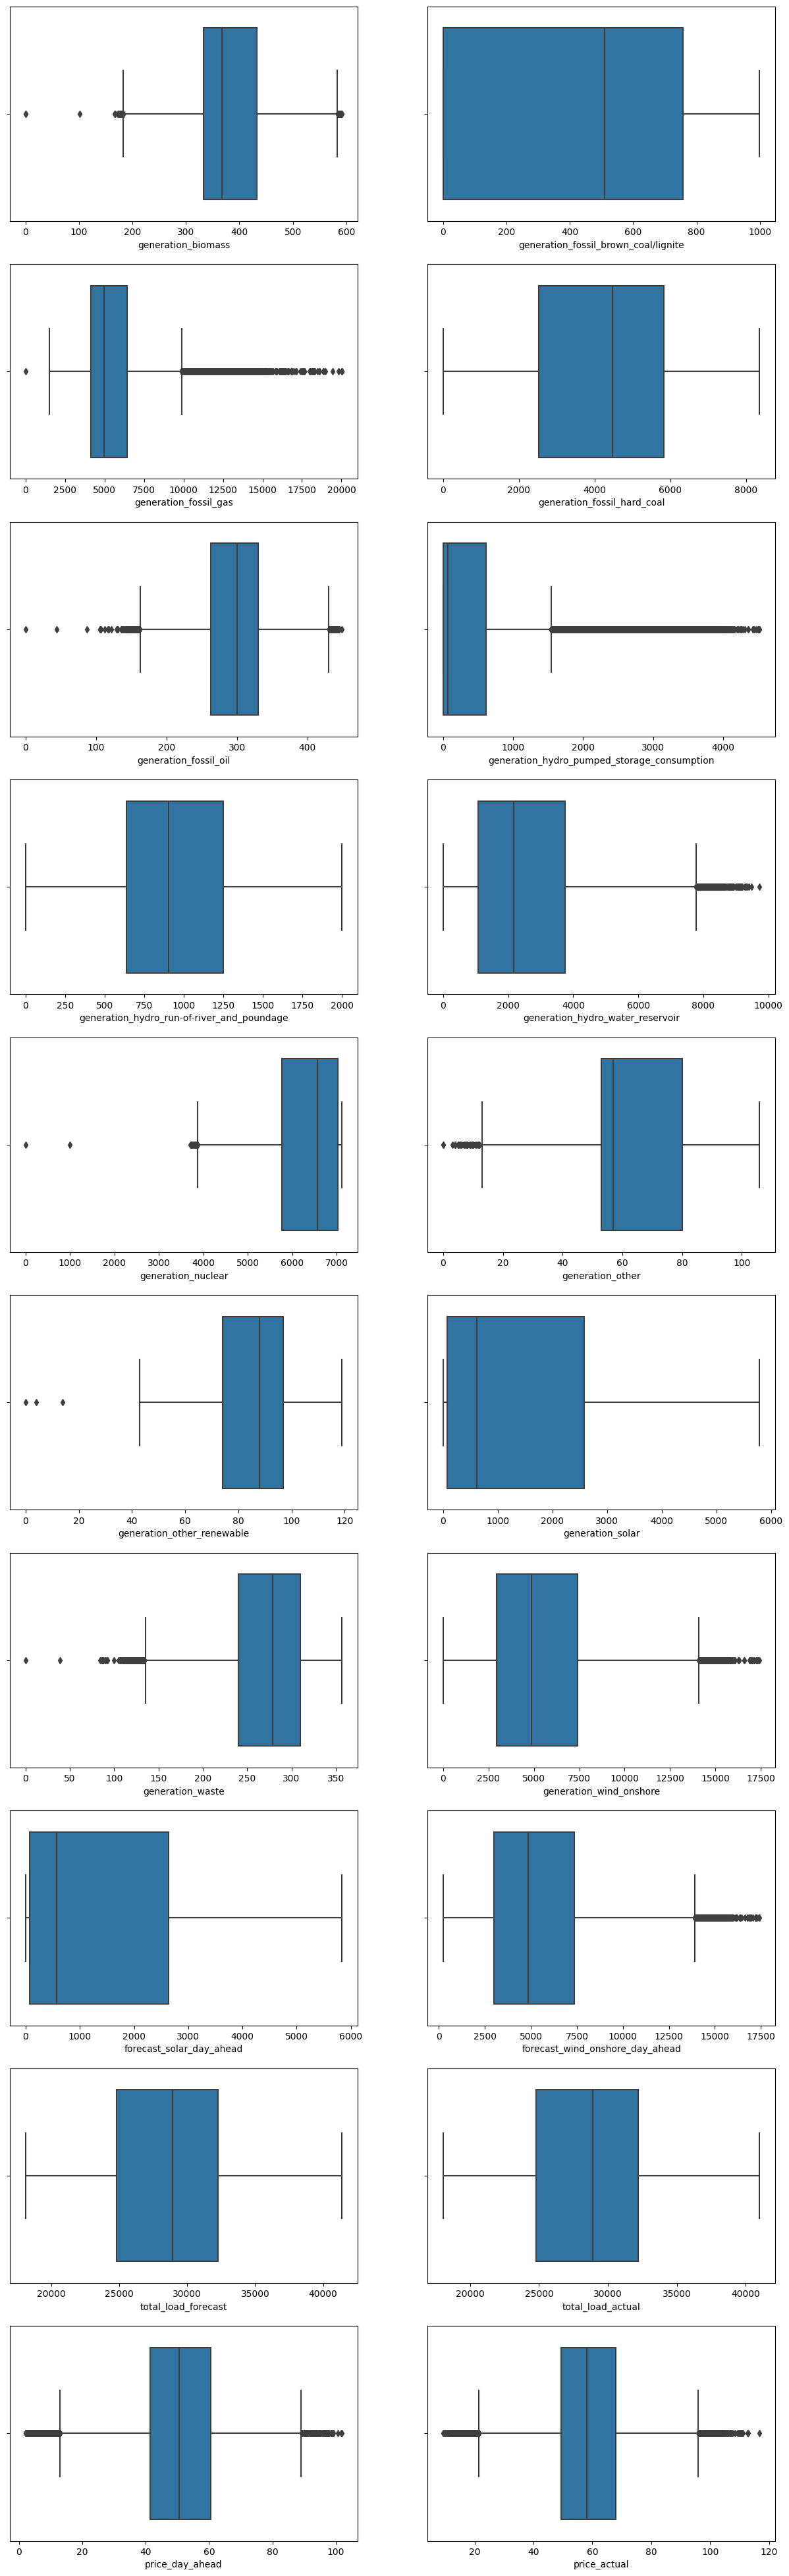

In [20]:
#boxplot to see the outliers 

plt.figure(figsize=(15,50))
columns = df.columns
for col in range(0,20):
    ax = plt.subplot(10,2,col+1)
    sns.boxplot(df[columns[col]], ax=ax)
    plt.xlabel(columns[col])


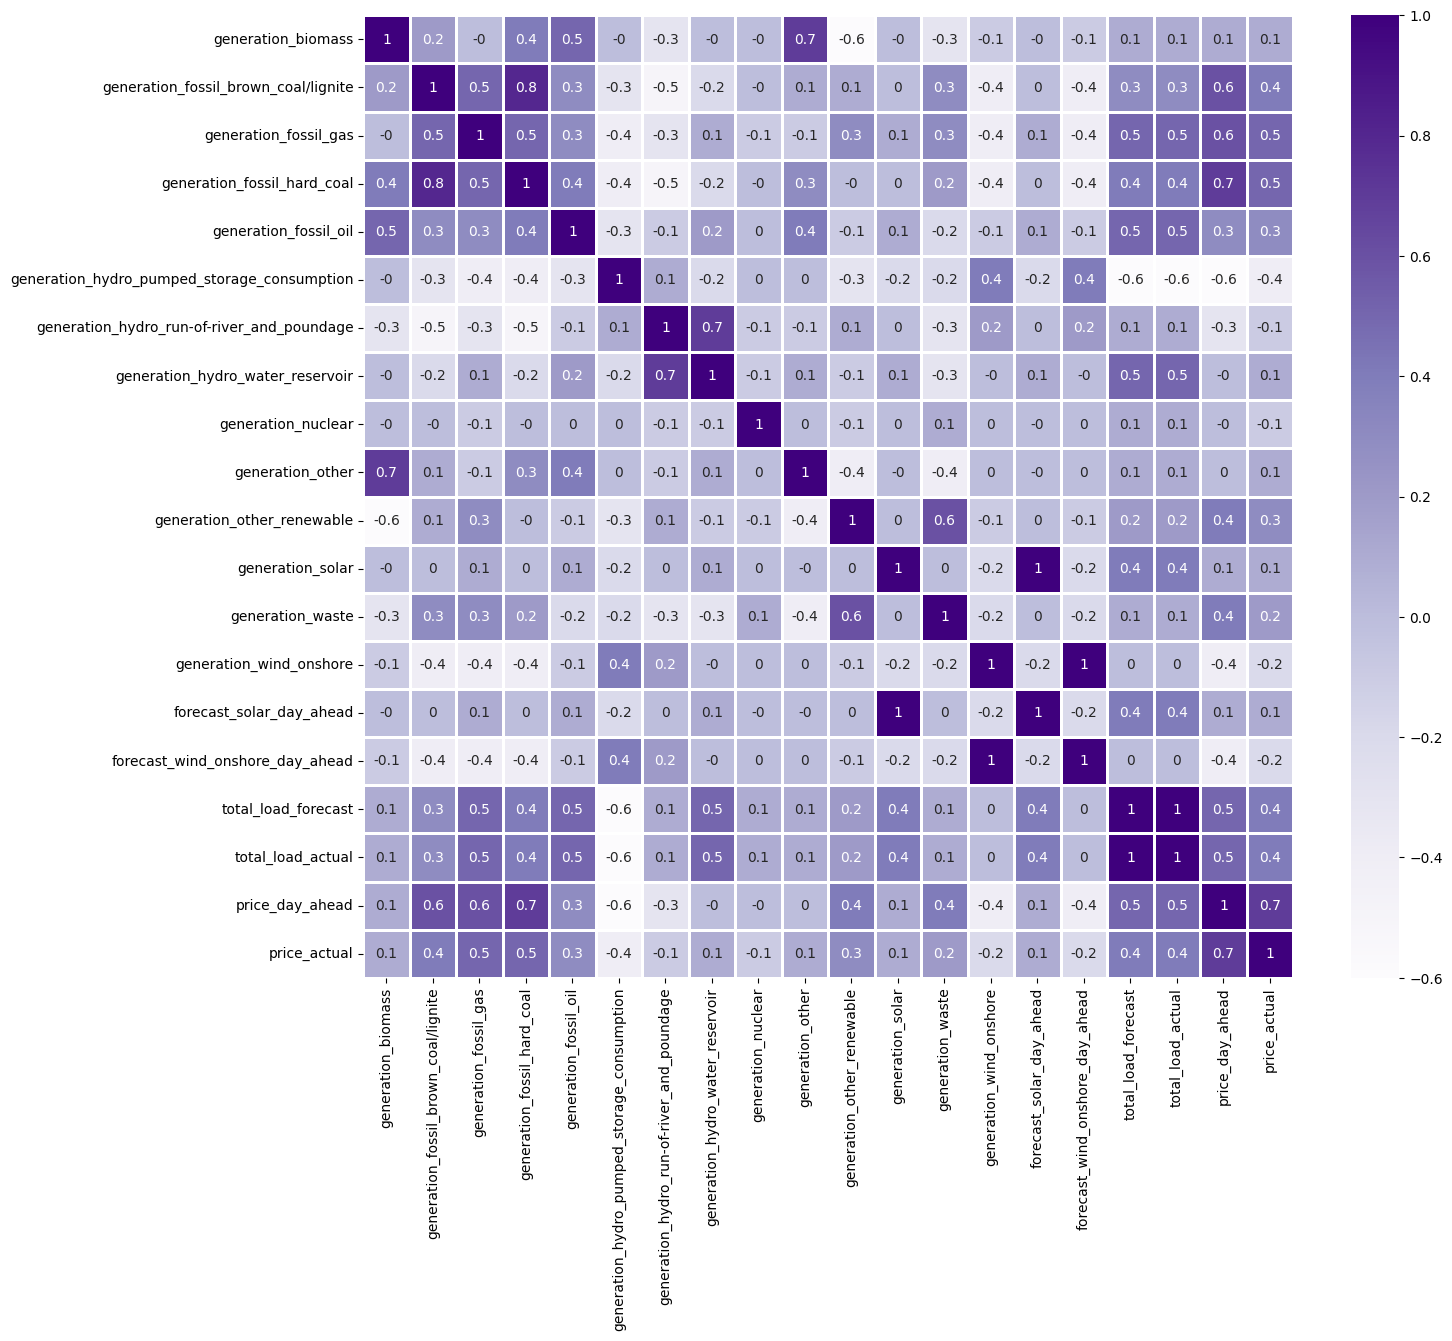

In [16]:
# Set Figure Size
plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(df.corr(),1),annot=True,cmap='Purples',linewidth=0.9)
plt.show();

In [17]:
# Sort index
df = df.sort_index()

# Set conditional satements for filtering times of month to season value
condition_winter = (df.index.month>=1)&(df.index.month<=3)
condtion_spring = (df.index.month>=4)&(df.index.month<=6)
condition_summer = (df.index.month>=7)&(df.index.month<=9)
condition_automn = (df.index.month>=10)@(df.index.month<=12)

# Create column in dataframe that inputs the season based on the conditions created above
df['season'] = np.where(condition_winter,'winter',
                        np.where(condtion_spring,'spring',
                                 np.where(condition_summer,'summer',
                                          np.where(condition_automn,'autumn',np.nan))))

df

generation_biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   
...                                       ...   
2018-12-31 19:00:00+01:00               297.0   
2018-12-31 20:00:00+01:00               296.0   
2018-12-31 21:00:00+01:00               292.0   
2018-12-31 22:00:00+01:00               293.0   
2018-12-31 23:00:00+01:00               290.0   

                           generation_fossil_brown_coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   
...                                                         ...   
2018-12-31 19:00:00+01:00                                   0.0   
2018-12-31 20:00:00+01:00                                   0.0   
2018-12-31 21:00:00+01:00                                   0.0   
2018-12-31 22:00:00+01:00                                   0.0   
2018-12-31 23:00:00+01:00                                   0.0   

                           generation_fossil_gas  generation_fossil_hard_coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00                 7634.0                       2628.0   
2018-12-31 20:00:00+01:00                 7241.0                       2566.0   
2018-12-31 21:00:00+01:00                 7025.0                       2422.0   
2018-12-31 22:00:00+01:00                 6562.0                       2293.0   
2018-12-31 23:00:00+01:00                 6926.0                       2166.0   

                           generation_fossil_oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                  178.0   
2018-12-31 20:00:00+01:00                  174.0   
2018-12-31 21:00:00+01:00                  168.0   
2018-12-31 22:00:00+01:00                  163.0   
2018-12-31 23:00:00+01:00                  163.0   

                           generation_hydro_pumped_storage_consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          1.0   
2018-12-31 20:00:00+01:00                                          1.0   
2018-12-31 21:00:00+01:00                     

In [18]:
# Figure showing Price per total load
import plotly.express as px

fig = px.scatter(df,x='total_load_actual',
                 y='price_actual',
                 facet_col='season',
                 opacity=0.1,
                 title='Price Per MW Hour Compaired To Total Energy Genereated Per Season',)
                 #animation_frame=df.index.year)

# Figure customizations
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkslateblue')),
                  selector=dict(mode='markers'))

In [19]:
data_weather = pd.read_csv("raw_data/weather_features.csv")
data_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [20]:
data_weather.groupby(['weather_id', 'weather_main', 'weather_icon']).count()

dt_iso  city_name  temp  temp_min  \
weather_id weather_main weather_icon                                      
200        thunderstorm 11d               52         52    52        52   
                        11n               40         40    40        40   
201        thunderstorm 11d               76         76    76        76   
                        11n               51         51    51        51   
202        thunderstorm 11d               18         18    18        18   
...                                      ...        ...   ...       ...   
803        clouds       04d             8212       8212  8212      8212   
                        04n             7037       7037  7037      7037   
804        clouds       04               270        270   270       270   
                        04d              925        925   925       925   
                        04n             1366       1366  1366      1366   

                                      temp_max  pressure  humidity  \
weather_id weather_main weather_icon                                 
200        thunderstorm 11d                 52        52        52   
                        11n                 40        40        40   
201        thunderstorm 11d                 76        76        76   
                        11n                 51        51        51   
202        thunderstorm 11d                 18        18        18   
...                                        ...       ...       ...   
803        clouds       04d               8212      8212      8212   
                        04n               7037      7037      7037   
804        clouds       04                 270       270       270   
                        04d                925       925       925   
                        04n               1366      1366      1366   

                                      wind_speed  wind_deg  rain_1h  rain_3h  \
weather_id weather_main weather_icon                                           
200        thunderstorm 11d                   52        52       52       52   
                        11n                   40        40       40       40   
201        thunderstorm 11d                   76        76       76       76   
                        11n                   51        51       51       51   
202        thunderstorm 11d                   18        18       18       18   
...                                          ...       ...      ...      ...   
803        clouds       04d                 8212      8212     8212     8212   
                        04n                 7037      7037     7037     7037   
804        clouds       04                   270       270      270      270   
                        04d                  925       925      925      925   
                        04n                 1366      1366     1366     1366   

                                      snow_3h  clouds_all  weather_description  
weather_id weather_main weather_icon                                            
200        thunderstorm 11d                52          52                   52  
                        11n                40          40                   40  
201        thunderstorm 11d                76          76                   76  
                        11n                51          51                   51  
202        thunderstorm 11d                18          18                   18  
...                                       ...         ...                  ...  
803        clouds       04d              8212        8212                 8212  
                        04n              7037        7037                 7037  
804        clouds       04                270         270                  270  
                        04d               925         925                  925  
                        04n              1366        1366                 1366  

[84 rows x 14 columns]

In [21]:
def import_data(dataset):
    '''Imports sepcified dataset fomr raw_data directory.
        Parameters:
                dataset (str): energy_data or weather_features
        Returns:
                DataFrame
    '''

    path = os.getcwd()
    full_path = path + '/raw_data/' + dataset + '.csv'
    print(f"Importing {dataset} data from {full_path}...")
    df_raw = pd.read_csv(full_path)

    return df_raw

In [22]:
def import_clean_weather_data(df_weather):
    '''Returns cleaned weather data.
        Parameters:
                None
        Returns:
                DataFrame
    '''
    df_weather = import_data('weather_features')
    df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True)
    df_weather = df_weather.rename(columns={'dt_iso': 'time'})
    df_weather = df_weather.set_index('time')

    return df_weather

In [23]:
cleaned_weather = import_clean_weather_data(data_weather)

Importing weather_features data from /home/rahmah/code/marvinliebisch/forecasting-electricity-prices/raw_data/weather_features.csv...


In [24]:
cleaned_weather.dtypes

city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [25]:
len(cleaned_weather.dtypes)

16

In [26]:
cleaned_weather.head()

city_name     temp  temp_min  temp_max  pressure  \
time                                                                         
2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
time                                                                          
2014-12-31 23:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 00:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 02:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 03:00:00+00:00        78           0        23      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
time                                                                      
2014-12-31 23:00:00+00:00      0.0           0         800        clear   
2015-01-01 00:00:00+00:00      0.0           0         800        clear   
2015-01-01 01:00:00+00:00      0.0           0         800        clear   
2015-01-01 02:00:00+00:00      0.0           0         800        clear   
2015-01-01 03:00:00+00:00      0.0           0         800        clear   

                          weather_description weather_icon  
time                                                        
2014-12-31 23:00:00+00:00        sky is clear          01n  
2015-01-01 00:00:00+00:00        sky is clear          01n  
2015-01-01 01:00:00+00:00        sky is clear          01n  
2015-01-01 02:00:00+00:00        sky is clear          01n  
2015-01-01 03:00:00+00:00        sky is clear          01n

In [27]:
# cleaned_weather = cleaned_weather.drop(columns=['weather_description'])
# cleaned_weather

In [28]:
# from sklearn.preprocessing import OneHotEncoder

# cleaned_weather_encode_columns = cleaned_weather.select_dtypes('object').columns
# for col in cleaned_weather_encode_columns:
#     encoder = OneHotEncoder(sparse=False)
#     cleaned_weather[encoder.get_feature_names_out()] = encoder.fit_transform(cleaned_weather[[col]])
# cleaned_weather    

In [29]:
# cleaned_weather.columns

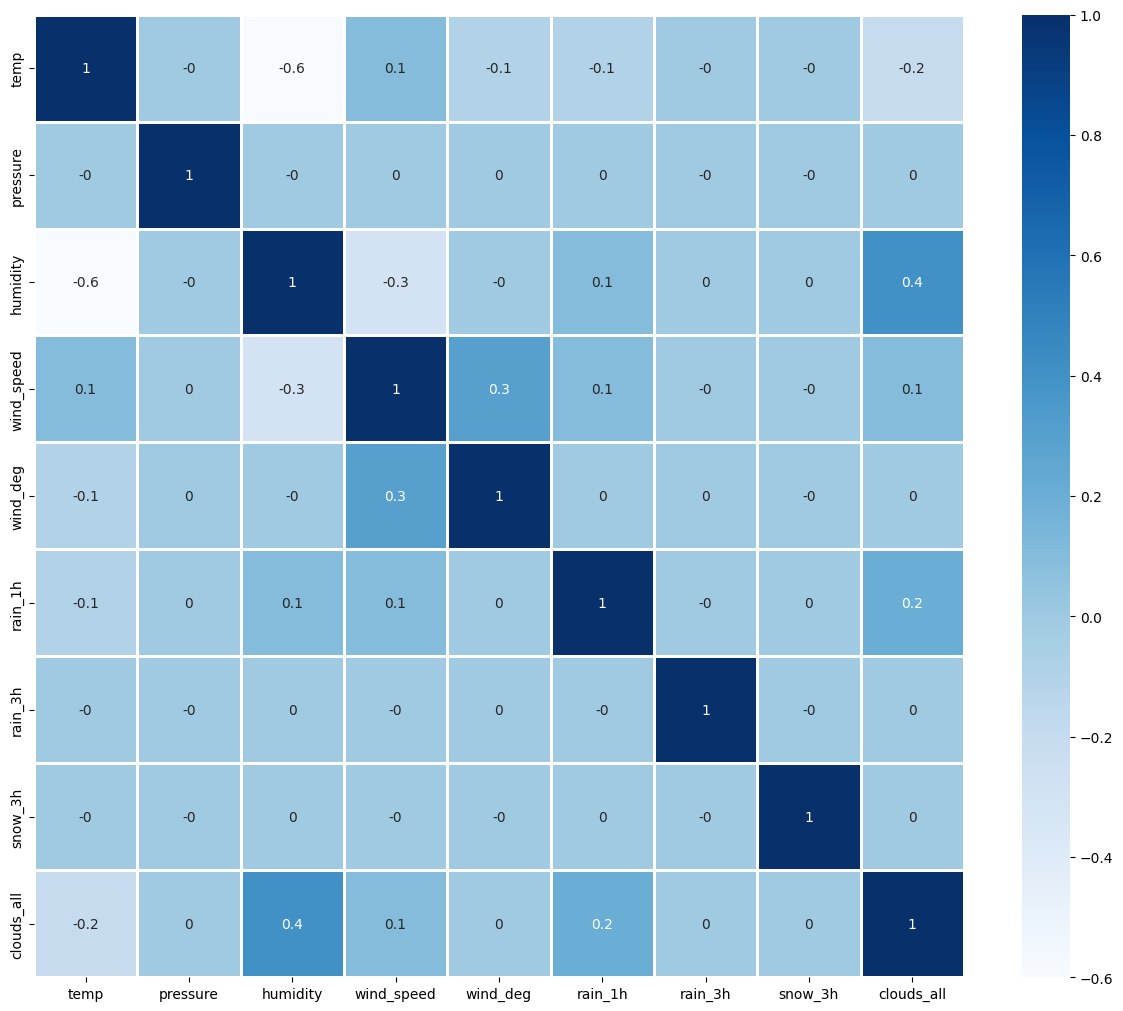

In [30]:
# Set Figure Size
plt.figure(figsize=(15,12.5))

# .corr heatmap of cleaned weather to visualize correlation & show plot
sns.heatmap(round(cleaned_weather.drop(columns=['city_name','temp_min','temp_max','weather_id','weather_main','weather_description','weather_icon']).corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

In [34]:
# histogram to see normal distribution of weather data features 

# plt.figure(figsize=(15,7))
# columns = cleaned_weather.columns
# sns.histplot(cleaned_weather['temp_max'], kde=True)
# # for col in range(0,16):
#     ax = plt.subplot(10,2,col+1)
#     sns.histplot(cleaned_weather[columns[col]], kde=True, ax=ax)
#     plt.xlabel(columns[col])
#     plt.ylabel('count')

In [35]:
def import_merged_data(FeatureEngineering = True, TempMin = False, TempMax = False, WeatherIcon = False):
    '''Returns merged DataFrame containing the energy and weather data.
    Parameters:
            FeatureEngineering (bool): Default is True
            (Creates several time based features
            e.g. season, month, day of week, weekend, hour)
            TempMin, TempMax, WeatherIcon (bool): Default is False
            (Drops specified weather columns entirely)
    Returns:
            DataFrame
    '''

    df_energy = import_clean_energy_data(dropNA=True)
    df_weather = import_clean_weather_data()

    if FeatureEngineering == True:
        df_energy['hour'] = df_energy.index.hour
        df_energy['month'] = df_energy.index.month

        season_dict = {1: 'Winter',
                    2: 'Winter',
                    3: 'Spring',
                    4: 'Spring',
                    5: 'Spring',
                    6: 'Summer',
                    7: 'Summer',
                    8: 'Summer',
                    9: 'Fall',
                    10: 'Fall',
                    11: 'Fall',
                    12: 'Winter'}

        df_energy['season'] = df_energy.index.month.map(lambda x: season_dict[x])
        df_energy['weekend'] = (df_energy.index.dayofweek > 4).astype(int)
        df_energy['day_of_week'] = df_energy.index.dayofweek

    if TempMin == False:
        df_weather = df_weather.drop(columns=['temp_min'])
    if TempMax == False:
        df_weather = df_weather.drop(columns=['temp_max'])
    if WeatherIcon == False:
        df_weather = df_weather.drop(columns=['weather_icon'])

    df_weather['city_name'] = df_weather['city_name'].str.strip()
    city_array = df_weather['city_name'].unique()
    grouped = df_weather.groupby(df_weather.city_name)
    df_merged = df_energy

    for city in city_array:
        df_merged = df_merged.join(grouped
                                   .get_group(city)
                                   .drop(columns=['city_name'])
                                   .add_prefix(city.lower() + '_'))

    return df_merged

merged_df = import_merged_data()
print(merged_df.head())

NameError: name 'import_clean_energy_data' is not defined